# Randomized Optimization for

Here we use mlrose-ky to solve a ML weight optimization problem. Specifically, we'll compare the performance of gradient descent and simulated annearling on a neural network trained on a toy dataset (iris)

## Setup

In [9]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import mlrose_ky as mlrose

In [2]:
# Load and preprocess the Iris dataset
X, y = load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))
print("Preprocessed data shape:", X.shape, y.shape)

Preprocessed data shape: (150, 4) (150, 3)


In [3]:
# show examples of X and y (features and targets)
print("Example features (X):", X[:5])
print("Example targets (y):", y[:5])

Example features (X): [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
Example targets (y): [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [4]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (105, 4) (105, 3)
Testing set shape: (45, 4) (45, 3)


## Run Experiment w/ Gradient Descent, Genetic Algorithm, and Randomized Hill Climb

In [8]:
# Run experiment
algos = ["gradient_descent", "genetic_alg", "random_hill_climb"]
results = {}

for algo in algos:
    nn = mlrose.NeuralNetwork(
        hidden_nodes=[5],
        activation="relu",
        algorithm=algo,
        max_iters=1000,
        bias=True,
        is_classifier=True,
        learning_rate=0.1,
        early_stopping=True,
        clip_max=5,
        max_attempts=100,
        random_state=1,
        curve=True,
    )
    start = time.time()
    nn.fit(X_train, y_train)
    end = time.time()
    train_preds = np.argmax(nn.predict(X_train), axis=1)
    test_preds = np.argmax(nn.predict(X_test), axis=1)
    train_acc = np.mean(train_preds == np.argmax(y_train, axis=1))
    test_acc = np.mean(test_preds == np.argmax(y_test, axis=1))
    results[algo] = {
        "train_acc": train_acc,
        "test_acc": test_acc,
        "runtime": end - start,
        "curve": nn.fitness_curve,
    }

In [10]:
def print_results(results):
    print("\nResults:")
    for algo, res in results.items():
        print(f"{algo}:")
        print(f"  Train Accuracy: {res['train_acc']:.4f}")
        print(f"  Test Accuracy: {res['test_acc']:.4f}")
        print(f"  Runtime: {res['runtime']:.2f} seconds")

In [11]:
print_results(results)


Results:
gradient_descent:
  Train Accuracy: 0.4476
  Test Accuracy: 0.5111
  Runtime: 0.90 seconds
genetic_alg:
  Train Accuracy: 1.0000
  Test Accuracy: 0.9556
  Runtime: 90.93 seconds
random_hill_climb:
  Train Accuracy: 0.9714
  Test Accuracy: 0.9111
  Runtime: 0.64 seconds


Interesting, so gradient descent is by far the fastest but the genetic algorithm and RHC both found better train and test accuracies.

## Plot Results

Compare accuracy, runtime, convergence, and loss also???

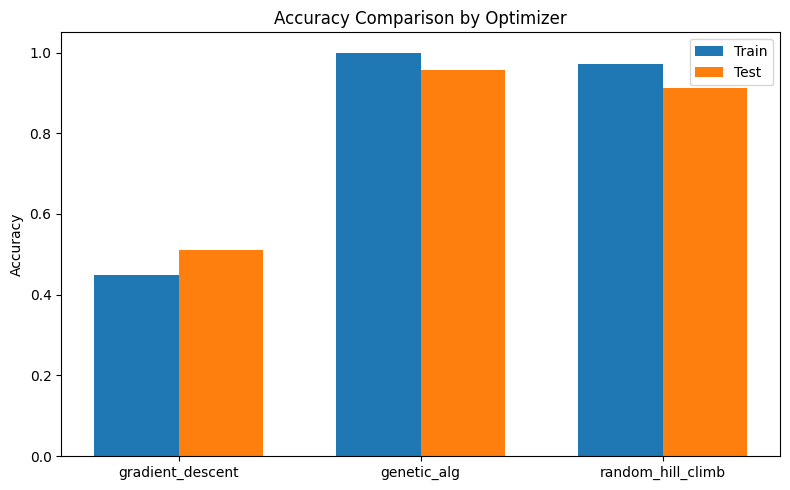

In [ ]:
# Plot Accuracy
x = np.arange(len(algos))
bar_width = 0.35
plt.figure(figsize=(8, 5))
plt.bar(x, [results[a]["train_acc"] for a in algos], width=bar_width, label="Train")
plt.bar(
    x + bar_width,
    [results[a]["test_acc"] for a in algos],
    width=bar_width,
    label="Test",
)
plt.xticks(x + bar_width / 2, algos)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison by Optimizer")
plt.legend()
plt.tight_layout()
plt.show()

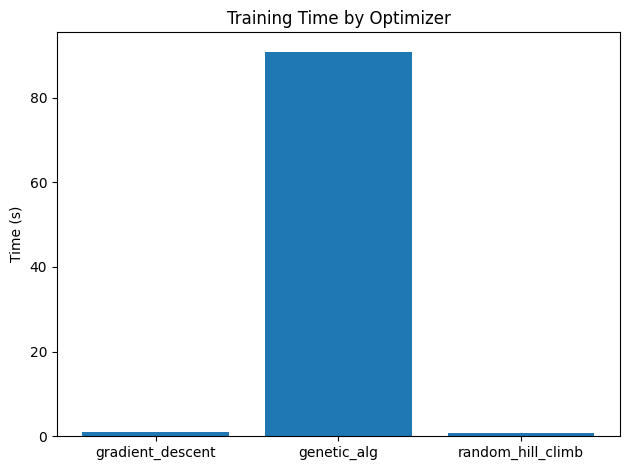

In [ ]:
# Plot Runtime
plt.figure()
plt.bar(algos, [results[a]["runtime"] for a in algos])
plt.ylabel("Time (s)")
plt.title("Training Time by Optimizer")
plt.tight_layout()
plt.show()

Overall, three randomized optimization algorithms for training a neural network on the Iris dataset were compared and demonstrated performance that aligns with expectations. 

Comparing gradient descent, genetic algorithm, and random hill climb against random would be a good next step along with evaluating effects of hyperparameter tuning as this nb only gets baseline performance.

Also, mlrose doesn't make it easy to look at convergence curves which would be nice to see because we know based on the optimization algorithm how their convergence should look.